In [33]:
import os

In [34]:
os.getcwd()

'c:\\Users\\SBAuser\\Desktop\\code\\class\\deep learning'

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = './data/wine.csv'
df = pd.read_csv(path,header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [36]:
df.shape

(6497, 13)

In [37]:
# 와인속성: x, 와인분류 (레드와인/화이트 와인): y 

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
# 학습 셋 , 테스트 셋 분리

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)

In [39]:
# 모델 구조 설정

model = Sequential()
model.add(Dense(30, input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

# 모델 컴파일

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 저장 설정 실행 
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.04f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

# 모델 실행 (fit >> train data)
# history = model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25)
# history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1,callbacks=[checkpointer])

history = model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1,callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                390       
                                                                 
 dense_21 (Dense)            (None, 12)                372       
                                                                 
 dense_22 (Dense)            (None, 8)                 104       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/8 [==>...........................] - ETA: 2s - loss: 3.1968 - accuracy: 0.1980
Epoch 1: val_loss improved from inf to 0.48677, saving model to ./data/model/all\01-0.7062.hdf

In [40]:
# 테스트 결과 출력

score = model.evaluate(x_test, y_test)
print('test dataset acc: ', round(score[1],2))

41/41 [==============================] - 0s 607us/step - loss: 0.0561 - accuracy: 0.9877
test dataset acc:  0.99


In [41]:
# 그래프로 과적합 확인하기

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.440855,0.448807,0.486766,0.706154
1,0.424284,0.756993,0.476048,0.742308
2,0.437141,0.764178,0.459115,0.746154
3,0.406421,0.771876,0.399438,0.760000
4,0.353562,0.793687,0.343300,0.791538
...,...,...,...,...
357,0.049269,0.983064,0.044902,0.986154
358,0.048444,0.984347,0.044858,0.986154
359,0.046906,0.983834,0.046674,0.983077
360,0.048697,0.984347,0.055061,0.980000


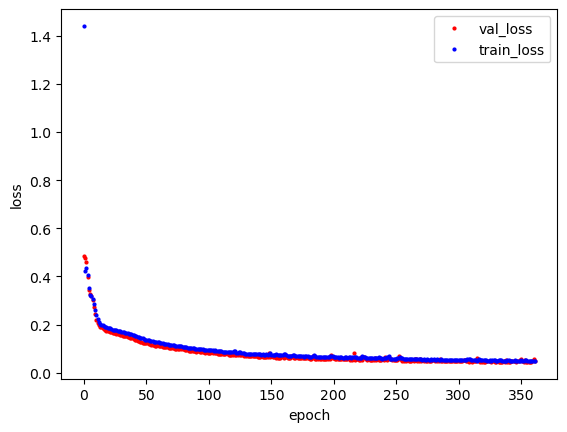

In [42]:
hist_df = pd.DataFrame(history.history)

# val_loss, val_acc 변화 보고 싶다.

y_vloss = hist_df['val_loss']

y_loss = hist_df['loss']

# x 값을 지정, 테스트셋 (검증용 셋)의 오차 >> 빨간색으로, 학습셋 오차 >> 파란색으로 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='val_loss')
plt.plot(x_len,y_loss,'o',c='blue', markersize=2,label='train_loss')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [44]:
# 테스트 결과 출력

score = model.evaluate(x_test,y_test) 
print('testset_acc: ',round(score[1],2)) 

41/41 [==============================] - 0s 553us/step - loss: 0.0561 - accuracy: 0.9877
testset_acc:  0.99
